In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
#database_path = "hawaii.sqlite"
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Hawaii_measurement = Base.classes.measurement
Hawaii_measurement

sqlalchemy.ext.automap.measurement

In [8]:
Hawaii_station = Base.classes.station
Hawaii_station

sqlalchemy.ext.automap.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Hawaii_measurement.date).order_by(Hawaii_measurement.date.desc()).first()

('2017-08-23')

In [38]:
precipitation = session.query(Hawaii_measurement.date, Hawaii_measurement.prcp).\
    filter(Hawaii_measurement.date > '2016-08-23').\
    order_by(Hawaii_measurement.date).all()
precipitation


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [45]:
prcp_df = pd.DataFrame(precipitation)
prcp_df1 = prcp_df.set_index("date")
prcp_df1 = prcp_df1.sort_index(ascending=True)
prcp_df1.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

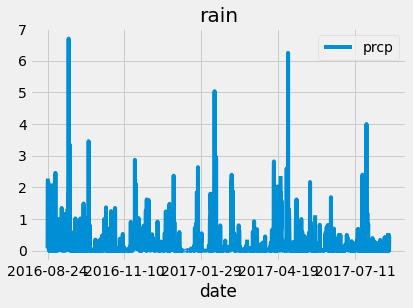

In [47]:
chart = prcp_df1.plot(title= "rain")
chart.xlabel("Date")
#chart.ylabel("Inches")
#chart.legend("Precipitation")

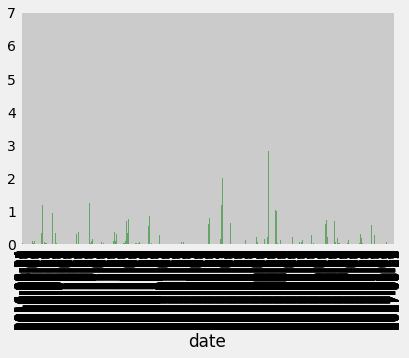

In [46]:
SF_Health_Chart = prcp_df1.plot(kind ="bar", facecolor="green", align="center", alpha=0.5, legend=False)



In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df1.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [49]:
# Design a query to calculate the total number stations in the dataset
session.query(Hawaii_station.station).order_by(Hawaii_station.station.desc()).count()

9

In [55]:
#or
session.query(Hawaii_measurement.station).order_by(Hawaii_measurement.station.desc()).count()

19550

In [57]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station = session.query(Hawaii_measurement.station, Hawaii_measurement.tobs).\
    order_by(Hawaii_measurement.station.desc()).all()
station


[('USC00519523', 75.0),
 ('USC00519523', 75.0),
 ('USC00519523', 77.0),
 ('USC00519523', 75.0),
 ('USC00519523', 75.0),
 ('USC00519523', 72.0),
 ('USC00519523', 68.0),
 ('USC00519523', 63.0),
 ('USC00519523', 69.0),
 ('USC00519523', 72.0),
 ('USC00519523', 68.0),
 ('USC00519523', 61.0),
 ('USC00519523', 60.0),
 ('USC00519523', 65.0),
 ('USC00519523', 68.0),
 ('USC00519523', 68.0),
 ('USC00519523', 70.0),
 ('USC00519523', 77.0),
 ('USC00519523', 74.0),
 ('USC00519523', 67.0),
 ('USC00519523', 70.0),
 ('USC00519523', 66.0),
 ('USC00519523', 75.0),
 ('USC00519523', 72.0),
 ('USC00519523', 65.0),
 ('USC00519523', 76.0),
 ('USC00519523', 69.0),
 ('USC00519523', 71.0),
 ('USC00519523', 65.0),
 ('USC00519523', 69.0),
 ('USC00519523', 72.0),
 ('USC00519523', 68.0),
 ('USC00519523', 66.0),
 ('USC00519523', 65.0),
 ('USC00519523', 68.0),
 ('USC00519523', 65.0),
 ('USC00519523', 76.0),
 ('USC00519523', 63.0),
 ('USC00519523', 71.0),
 ('USC00519523', 70.0),
 ('USC00519523', 66.0),
 ('USC00519523',

In [59]:
station_df = pd.DataFrame(station)
station_df1 = station_df.set_index("station")
station_df1 = station_df1.sort_index(ascending=True)
station_df1.head()

,tobs
station,
USC00511918,64.0
USC00511918,76.0
USC00511918,67.0
USC00511918,69.0
USC00511918,74.0


In [64]:
station_df1.value_counts("station")

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [88]:
station_temp_max = session.query(Hawaii_measurement.tobs).\
    filter(Hawaii_measurement.station == 'USC00519281').\
    order_by(Hawaii_measurement.tobs.desc()).first()
station_temp_max

(85.0)

In [89]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_temp_low = session.query(Hawaii_measurement.tobs).\
    filter(Hawaii_measurement.station == 'USC00519281').\
    order_by(Hawaii_measurement.tobs).first()
station_temp_low

(54.0)

In [86]:
station_temp_max = session.query(Hawaii_measurement.tobs).\
    filter(Hawaii_measurement.station == 'USC00519281').\
    order_by(Hawaii_measurement.station.tobs()).mean()
station_temp_max

AttributeError: Neither 'InstrumentedAttribute' object nor 'Comparator' object associated with measurement.station has an attribute 'tobs'

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()